In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

In [2]:
in_dir = 'out/113_114_115/'

In [3]:
def extra_clean(s):
    END_TOKENS = ['.', '!', '?', '...', "'", "`", '"',")"]
    s_new = s.strip().replace('``', '"').replace("''", '"').replace('-LRB-', '(').replace('-RRB-', ')')
    if s_new[-1] in END_TOKENS: return s_new
    return s_new + "."

In [4]:
def get_bill(row):
#     i, row = data
    bill_dict = {}
    bill = row.ID
    bill_dict['ID'] = bill
    
    # get, clean, and save bill
    bill_path = in_dir + 'BILL_' + bill + '.out'
    with open(bill_path) as f:
        bill_text = f.readlines()
    num_bill_sentences = len(bill_text)
    clean_bill = '\n'.join([extra_clean(i) for i in bill_text])
    bill_dict['bill_text'] = clean_bill
    bill_dict['bill_text_clean'] = ' '.join(clean_bill.split('\n'))
    bill_dict['bill_length'] = num_bill_sentences
    
    # get, clean, and save CRS summary
    summ_path = in_dir + 'SUMMARY_' + bill + '.out'
    with open(summ_path) as f:
        summ_text = f.readlines()
    num_summ_sentences = len(summ_text)
    clean_summ = '\n'.join([extra_clean(i) for i in summ_text])
    bill_dict['CRS_summary'] = clean_summ
    bill_dict['CRS_summary_clean'] = ' '.join(clean_summ.split('\n'))
    bill_dict['summ_length'] = num_summ_sentences
    
    return bill_dict

In [5]:
train = pd.read_csv('./out/train_113_114_115.csv')
dev = pd.read_csv('./out/validate_113_114_115.csv')
test = pd.read_csv('./out/test_113_114_115.csv')
all_files = pd.concat([train, dev, test], axis=0)

In [7]:
all_bills = []
for i in range(len(all_files)):
    all_bills.append(get_bill(all_files.iloc[i]))

In [8]:
all_bills_df = pd.DataFrame(all_bills)

In [9]:
all_bills_df.shape

(23062, 7)

In [10]:
all_bills_df.head()

,CRS_summary,CRS_summary_clean,ID,bill_length,bill_text,bill_text_clean,summ_length
0,Cybersecurity Responsibility and Accountabilit...,Cybersecurity Responsibility and Accountabilit...,114_HR6066_IH,95,To enforce Federal cybersecurity responsibilit...,To enforce Federal cybersecurity responsibilit...,9
1,This bill prohibits the President from using m...,This bill prohibits the President from using m...,115_HR1923_IH,4,To prohibit the use of members of the United S...,To prohibit the use of members of the United S...,1
2,Ariel Grace's Law.\nThis bill amends the Feder...,Ariel Grace's Law. This bill amends the Federa...,114_HR5403_IH,11,"To amend the Federal Food , Drug , and Cosmeti...","To amend the Federal Food , Drug , and Cosmeti...",2
3,Agricultural Worker Program Act of 2017.\nThis...,Agricultural Worker Program Act of 2017. This ...,115_S1034_IS,364,"To improve agricultural job opportunities , be...","To improve agricultural job opportunities , be...",8
4,Honoring Investments in Recruiting and Employi...,Honoring Investments in Recruiting and Employi...,115_S438_IS,92,"To encourage effective , voluntary investments...","To encourage effective , voluntary investments...",10


In [11]:
def get_bill_type(row):
    bill_id = row.ID
    splits = bill_id.split('_')
    if splits[1][0] == 'S':
        return 'S'
    elif splits[1][0] == 'H':
        return 'HR'
    else:
        print(bill_id)

In [12]:
all_bills_df['bill_type'] = all_bills_df.apply(lambda x: get_bill_type(x), axis=1)

In [13]:
all_bills_df.head()

,CRS_summary,CRS_summary_clean,ID,bill_length,bill_text,bill_text_clean,summ_length,bill_type
0,Cybersecurity Responsibility and Accountabilit...,Cybersecurity Responsibility and Accountabilit...,114_HR6066_IH,95,To enforce Federal cybersecurity responsibilit...,To enforce Federal cybersecurity responsibilit...,9,HR
1,This bill prohibits the President from using m...,This bill prohibits the President from using m...,115_HR1923_IH,4,To prohibit the use of members of the United S...,To prohibit the use of members of the United S...,1,HR
2,Ariel Grace's Law.\nThis bill amends the Feder...,Ariel Grace's Law. This bill amends the Federa...,114_HR5403_IH,11,"To amend the Federal Food , Drug , and Cosmeti...","To amend the Federal Food , Drug , and Cosmeti...",2,HR
3,Agricultural Worker Program Act of 2017.\nThis...,Agricultural Worker Program Act of 2017. This ...,115_S1034_IS,364,"To improve agricultural job opportunities , be...","To improve agricultural job opportunities , be...",8,S
4,Honoring Investments in Recruiting and Employi...,Honoring Investments in Recruiting and Employi...,115_S438_IS,92,"To encourage effective , voluntary investments...","To encourage effective , voluntary investments...",10,S


In [14]:
print(all_bills_df.bill_length.median())
print(all_bills_df.groupby('bill_type').bill_length.median())
print()
print(all_bills_df.bill_length.mean())
print(all_bills_df.groupby('bill_type').bill_length.mean())

27.0
bill_type
HR    24
S     33
Name: bill_length, dtype: int64

93.04561616512011
bill_type
HR     84.605462
S     109.467748
Name: bill_length, dtype: float64


In [15]:
print(all_bills_df.summ_length.median())
print(all_bills_df.groupby('bill_type').summ_length.median())
print()
print(all_bills_df.summ_length.mean())
print(all_bills_df.groupby('bill_type').summ_length.mean())

3.0
bill_type
HR    3
S     3
Name: summ_length, dtype: int64

5.82026710606192
bill_type
HR    5.604674
S     6.239750
Name: summ_length, dtype: float64


In [16]:
all_bills_df.to_csv('all_bills_info.csv')

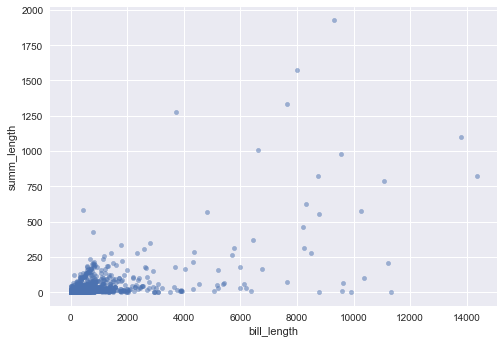

In [51]:
fig, ax = plt.subplots()
all_bills_df.plot(x='bill_length', y='summ_length', kind='scatter', alpha=0.5, ax=ax)

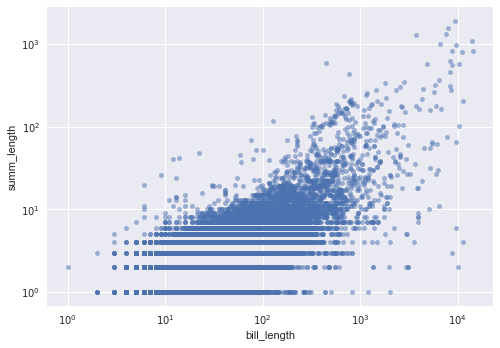

In [53]:
fig, ax = plt.subplots()
all_bills_df.plot(x='bill_length', y='summ_length', kind='scatter', alpha=0.5, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

In [18]:
cmap = {'HR': '#1b9e77', 'S': '#d95f02'}

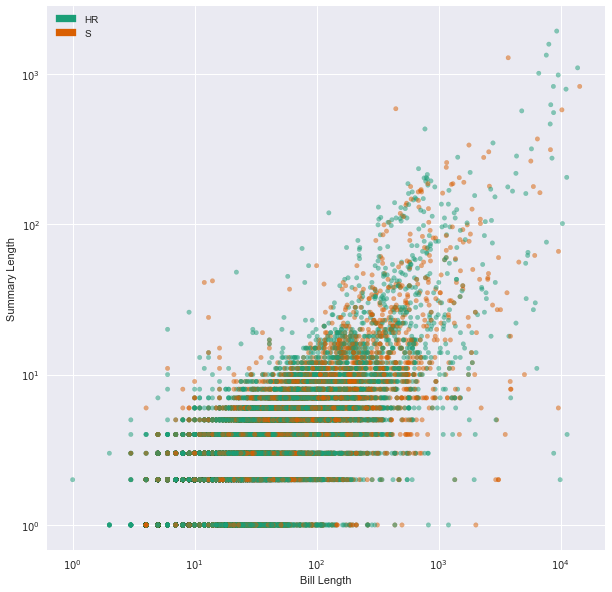

In [20]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,10))
all_bills_df.plot(x='bill_length', y='summ_length', kind='scatter', alpha=0.5, 
                  c=all_bills_df['bill_type'].apply(lambda x: cmap[x]), ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Bill Length')
ax.set_ylabel('Summary Length')

HR_patch = mpatches.Patch(color=cmap['HR'], label='HR')
S_patch = mpatches.Patch(color=cmap['S'], label='S')
plt.legend(handles=[HR_patch, S_patch])

In [22]:
import seaborn as sns

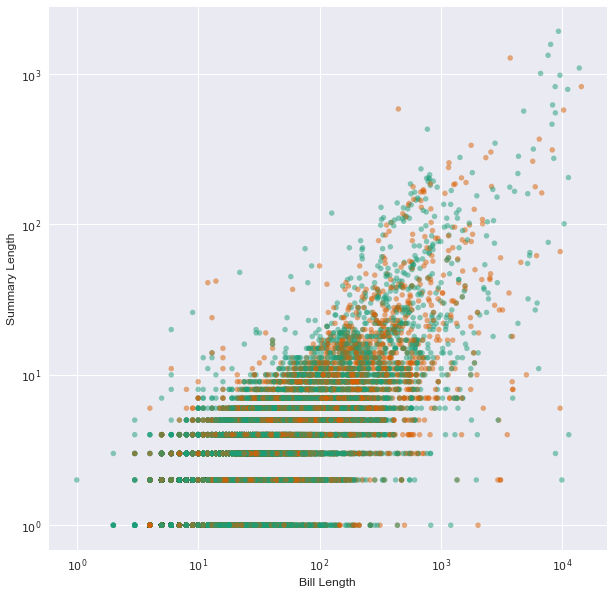

In [50]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
# sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(10,10))

# Create scatterplot of dataframe
grid = sns.regplot('bill_length', # Horizontal axis
           'summ_length', # Vertical axis
           data=all_bills_df, # Data source
           fit_reg=False, # Don't fix a regression line
           ax=ax,
#            hue="bill_type", # Set color
           scatter_kws={
                        "marker": "D", # Set marker style
                        "s": 30,
                       "alpha": 0.5,
                       "c": all_bills_df['bill_type'].apply(lambda x: cmap[x]),
                        "color": None}) # S marker size

grid.set(xscale='log', yscale='log')
# leg = ax.get_legend()
# leg.set_title('Bill Type')

# Set title
# plt.title('Histogram of IQ')

# Set x-axis label
plt.xlabel('Bill Length')

# Set y-axis label
plt.ylabel('Summary Length')

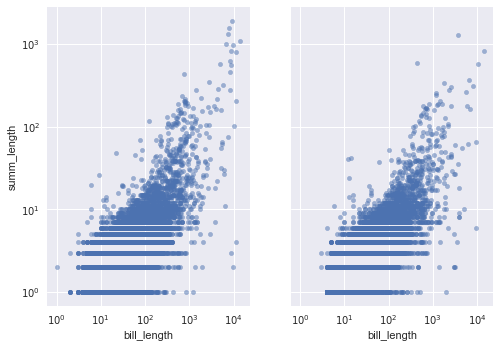

In [62]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
all_bills_df[all_bills_df.bill_type == 'HR'].plot(x='bill_length', y='summ_length', kind='scatter', alpha=0.5, ax=ax[0])
all_bills_df[all_bills_df.bill_type == 'S'].plot(x='bill_length', y='summ_length', kind='scatter', alpha=0.5, ax=ax[1])

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

/Users/stephaniedoctor/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/stephaniedoctor/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


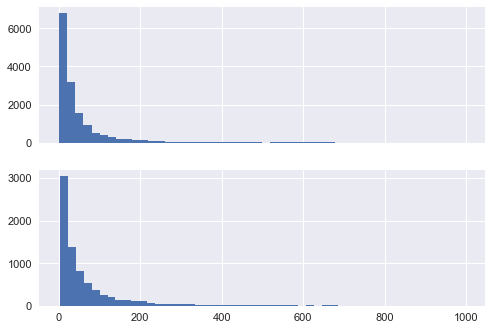

In [60]:
fig, ax = plt.subplots(2, sharex=True)
all_bills_df[all_bills_df.bill_type == 'HR'][all_bills_df.bill_length < 1000].bill_length.hist(bins=50, ax=ax[0])
all_bills_df[all_bills_df.bill_type == 'S'][all_bills_df.bill_length < 1000].bill_length.hist(bins=50, ax=ax[1])

/Users/stephaniedoctor/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/stephaniedoctor/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


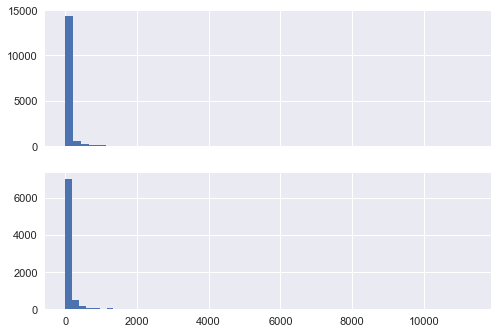

In [61]:
fig, ax = plt.subplots(2, sharex=True)
all_bills_df[all_bills_df.bill_type == 'HR'][all_bills_df.summ_length < 250].bill_length.hist(bins=50, ax=ax[0])
all_bills_df[all_bills_df.bill_type == 'S'][all_bills_df.summ_length < 250].bill_length.hist(bins=50, ax=ax[1])